<a href="https://colab.research.google.com/github/JOAOPEDROMAGAL/APRENDIZAGEM/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount = "/content/drive/MyDrive/Colab Notebooks/Datasets/Titanic"
import pandas as pd
import numpy as np
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Titanic/test.csv')
df_train.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [ ]:
Train_columns = pd.DataFrame({'Columns': df_train.columns, 
                              'Index_0': range(len(df_train.columns.tolist()))})
Test_columns = pd.DataFrame({'Columns': df_test.columns, 
                             'Index_1': range(len(df_test.columns.tolist()))})

merge_0 = pd.merge(Train_columns, Test_columns, on = 'Columns', how = 'left')

merge_0[merge_0.isnull().any(axis = 1)]                                   

,Columns,Index_0,Index_1
1,Survived,1,NaN


In [ ]:
train_info = pd.DataFrame(zip(df_train.columns, df_train.count(), 
                              df_train.nunique(), df_train.dtypes))

train_info.columns = ['Column', 'Count', 'Unique values', 'Dtype']

test_info = pd.DataFrame(zip(df_test.columns, df_test.count(), 
                             df_test.nunique(), df_test.dtypes))

test_info.columns = ['Column', 'Count', 'Unique values', 'Dtype']

pd.concat([train_info, test_info], axis = 1, join = 'outer', 
           keys = ['Train', 'Test'], ignore_index = False)

Train                      ...   Test                       
         Column Count Unique values  ...  Count Unique values    Dtype
0   PassengerId   891           891  ...  418.0         418.0    int64
1      Survived   891             2  ...  418.0           3.0    int64
2        Pclass   891             3  ...  418.0         418.0   object
3          Name   891           891  ...  418.0           2.0   object
4           Sex   891             2  ...  332.0          79.0  float64
5           Age   714            88  ...  418.0           7.0    int64
6         SibSp   891             7  ...  418.0           8.0    int64
7         Parch   891             7  ...  418.0         363.0   object
8        Ticket   891           681  ...  417.0         169.0  float64
9          Fare   891           248  ...   91.0          76.0   object
10        Cabin   204           147  ...  418.0           3.0   object
11     Embarked   889             3  ...    NaN           NaN      NaN

[12 rows x 8 columns]

In [ ]:
for column in {'Sex', 'SibSp', 'Parch', 'Embarked'}:
    df_train[column] = df_train[column].astype('category')
    
for column in {'Sex', 'SibSp', 'Parch', 'Embarked'}:
    df_test[column] = df_test[column].astype('category')

round((df_train.isnull().sum()/len(df_train)*100).sort_values(
       ascending = False), 1)


Cabin          77.1
Age            19.9
Embarked        0.2
Fare            0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
Survived        0.0
PassengerId     0.0
dtype: float64

In [ ]:

round((df_test.isnull().sum()/len(df_test)*100).sort_values(
       ascending = False), 1)

Cabin          78.2
Age            20.6
Fare            0.2
Embarked        0.0
Ticket          0.0
Parch           0.0
SibSp           0.0
Sex             0.0
Name            0.0
Pclass          0.0
PassengerId     0.0
dtype: float64

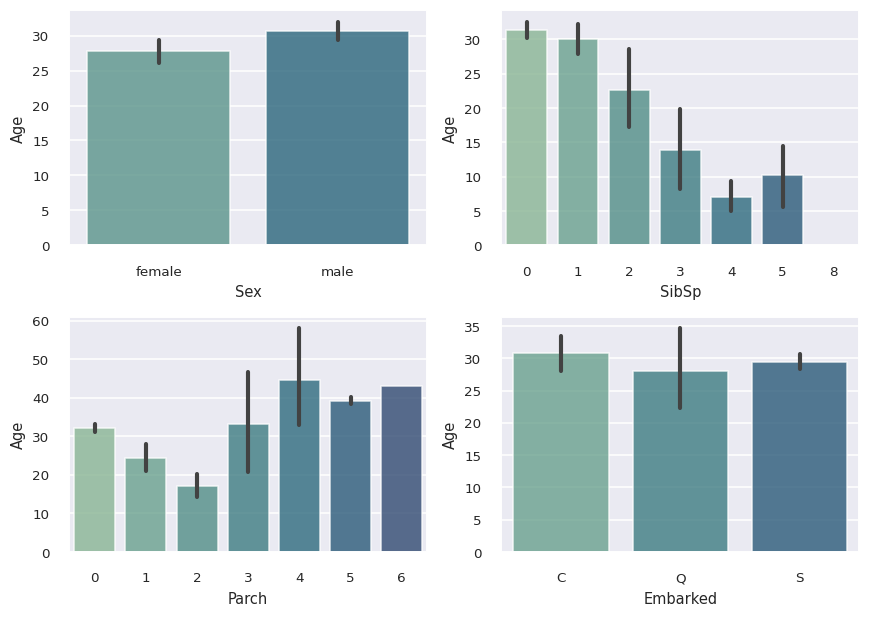

In [ ]:
df_train.drop('Cabin', axis = 1, inplace = True)
df_test.drop('Cabin', axis = 1, inplace = True)

import seaborn as sns

sns.set_style("darkgrid")

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn')

train_no_NA = df_train.dropna()

train_cat_visual_0 = df_train.dropna().copy().select_dtypes(
                     include = ['object', 'category']).columns.tolist()

train_cat_visual_0.remove('Name')
train_cat_visual_0.remove('Ticket')

sns.set(rc = {'figure.dpi': 110}, font_scale = 0.8)

fig, ax = plt.subplots(3, 2, figsize = (8, 8))

for indx, (column, axes) in list(enumerate(list(zip(train_cat_visual_0, 
                                                    ax.flatten())))):
    
    sns.barplot(ax = axes, x = train_no_NA[column], y = train_no_NA['Age'], 
                palette = 'crest', alpha = 0.8)
    
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
    
plt.tight_layout()
plt.show()